# Mission 1 Analyse en composantes principales

Vous réaliserez une analyse en composantes principales de l'échantillon, en suivant toutes ces étapes :

analyse de l'éboulis des valeurs propres ;
représentation des variables par le cercle des corrélations ;
représentation des individus par les plans factoriels ;
analyser de la qualité de représentation et la contribution des individus.
Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.



In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
#import time

from P6_Functions import *
from sklearn.preprocessing import StandardScaler

#from sklearn import metrics
#from scipy.stats import loguniform
#from sklearn.cluster import KMeans
#from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import silhouette_samples, silhouette_score, plot_confusion_matrix
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#4cb2ff', '#61ba86'])

In [50]:
data = pd.read_csv('datas/notes.csv' , header=0, sep=",", decimal=".")
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


# L'ACP
En fait, l’ACP est une méthode bien connue de réduction de dimension qui va permettre de transformer des variables très corrélées en nouvelles variables décorrélées les unes des autres. 

**Le principe est simple** : Il s’agit en fait de résumer l’information qui est contenue dans une large base de données en un certain nombre de variables synthétiques appelées : Composantes principales. 

**L’idée** est  de pouvoir projeter ces données sur l’hyperplan le plus proche afin d’avoir une représentation simple de nos données.
Évidemment, qui dit réduction de dimension dit perte d’informations. C’est là tout l’enjeu que représente une Analyse en Composantes principales. Il faut pouvoir réduire la dimension de nos données tout en conservant un maximum d’informations.

**Comment fonctionne une Analyse en composantes principales ?**

Il est important de centrer et réduire nos variables pour atténuer l’effet d’échelle car elles ne sont pas calculées sur la même base.
Il faut voir nos données comme une matrice à partir de laquelle nous allons calculer des valeurs propres et vecteurs propres.

En algèbre linéaire, la notion de vecteur propre(eigenvector) correspond à l’étude des axes privilégiés, selon lesquels une application d’un espace dans lui-même se comporte comme une dilatation, multipliant les vecteurs par une  constante appelée valeur propre(eigenvalue). Les vecteurs auxquels il s’applique s’appellent vecteurs propres, réunis en un espace propre

## Preprocessing

In [51]:
#Préparation du jeu de données pour l'ACP
df = data.copy()
df.index = df['is_genuine']
del df['is_genuine']

# select columns for CPA
df_pca = data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

#data preparation for PCA
X = df_pca.values
names = df.index # ou data['columns'] pour avoir les intitulés
features = df.columns

#centering but no reduction because the data already has the same unit
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
X_scaled

array([[-0.42834385,  2.6694537 ,  3.09656321, -0.13159013, -1.18987367,
         0.28163308],
       [-0.88755932, -1.09769709, -0.69125444, -0.86012554, -1.27473985,
         0.78069736],
       [-0.36274164, -1.03042654, -0.50943919, -0.30301023, -1.23230676,
         1.37740465],
       ...,
       [ 1.73652911,  0.68497248,  0.52084721,  0.38267015,  0.67718214,
        -2.05094997],
       [-0.39554274, -0.32408577, -0.1458087 ,  0.16839504,  1.61071005,
        -0.75989238],
       [ 0.06367273, -0.22317994,  0.06630909,  1.45404575,  0.38015054,
        -1.74717171]])

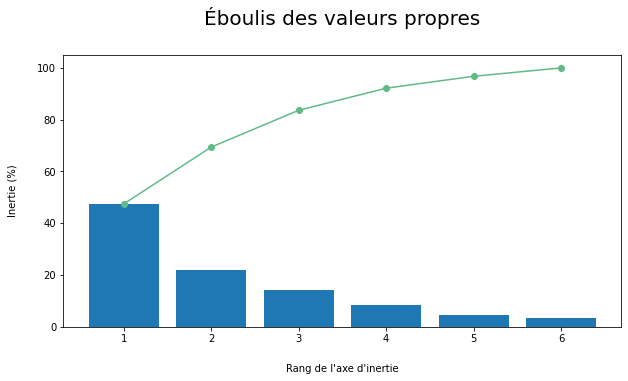

In [52]:

#choice of the number of components to calculate
n_comp = 6

#calculation of the main components
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)


display_scree_plot(pca)
plt.savefig("graphiques\05. Screeplot.jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)


In [53]:
#variance expliquée 
valprop = pca.explained_variance_
print(valprop)



[2.86372065 1.32522178 0.85912514 0.51460481 0.27840703 0.19442354]


In [54]:


#proportion de variance expliquée 
 #Le paramètre pca.explained_variance_ratio_ renvoie un vecteur de la variance expliquée par chaque dimension.

valprop_ratio = pca.explained_variance_ratio_*100  
print(valprop_ratio)  


[47.44792058 21.95710596 14.23452433  8.52629544  4.61282244  3.22133125]


In [55]:
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(valprop_ratio.cumsum())



[ 47.44792058  69.40502654  83.63955087  92.16584631  96.77866875
 100.        ]


La méthode du coude précise une représentation satisfaisante de nos variables sur les deux premières composantes principales, le premier axe factoriel.

69.4% de la variance des données est expliquée par les deux premières composantes. L'analyse sera traitée ainsi, car l'ajout d'autres composantes n'apporte pas réellement de valeur ajoutée, du moins pas dans notre contexte actuel.


## Cercle des corrélations et projection des individus

In [56]:
#circles of correlations
pcs = pca.components_

#projection
X_projected = pca.transform(X_scaled)



In [62]:
sqrt_valprop = np.sqrt(valprop)
sqrt_valprop
#corrélation des variables avec les axes 
corvar = np.zeros((6,6)) 
for k in range(6): 
    corvar[:,k] = pca.components_[k,:] * sqrt_valprop[k] 

#afficher la matrice des corrélations variables x facteurs 
print(corvar)

#on affiche pour les deux premiers axes 
matrice=pd.DataFrame({'id':df_pca.columns,'COR_F1':corvar[:,0],'COR_F2':corvar[:,1]})
matrice

[[ 0.12399984  0.89750708 -0.08239513 -0.40152883 -0.11876949  0.05386727]
 [ 0.80466983  0.39053898  0.11378517  0.19945918  0.37775042  0.10235485]
 [ 0.83228631  0.2711525   0.14258369  0.32922354 -0.25695832 -0.21200743]
 [ 0.7294063  -0.36899666  0.47531625 -0.16250184 -0.16457596  0.24146933]
 [ 0.59658665 -0.16245462 -0.76111465  0.09708712 -0.10233243  0.15625837]
 [-0.78752871  0.36208895  0.11763482  0.41155139 -0.13424124  0.23102831]]


,id,COR_F1,COR_F2
0,diagonal,0.124000,0.897507
1,height_left,0.804670,0.390539
2,height_right,0.832286,0.271153
3,margin_low,0.729406,-0.368997
4,margin_up,0.596587,-0.162455
5,length,-0.787529,0.362089


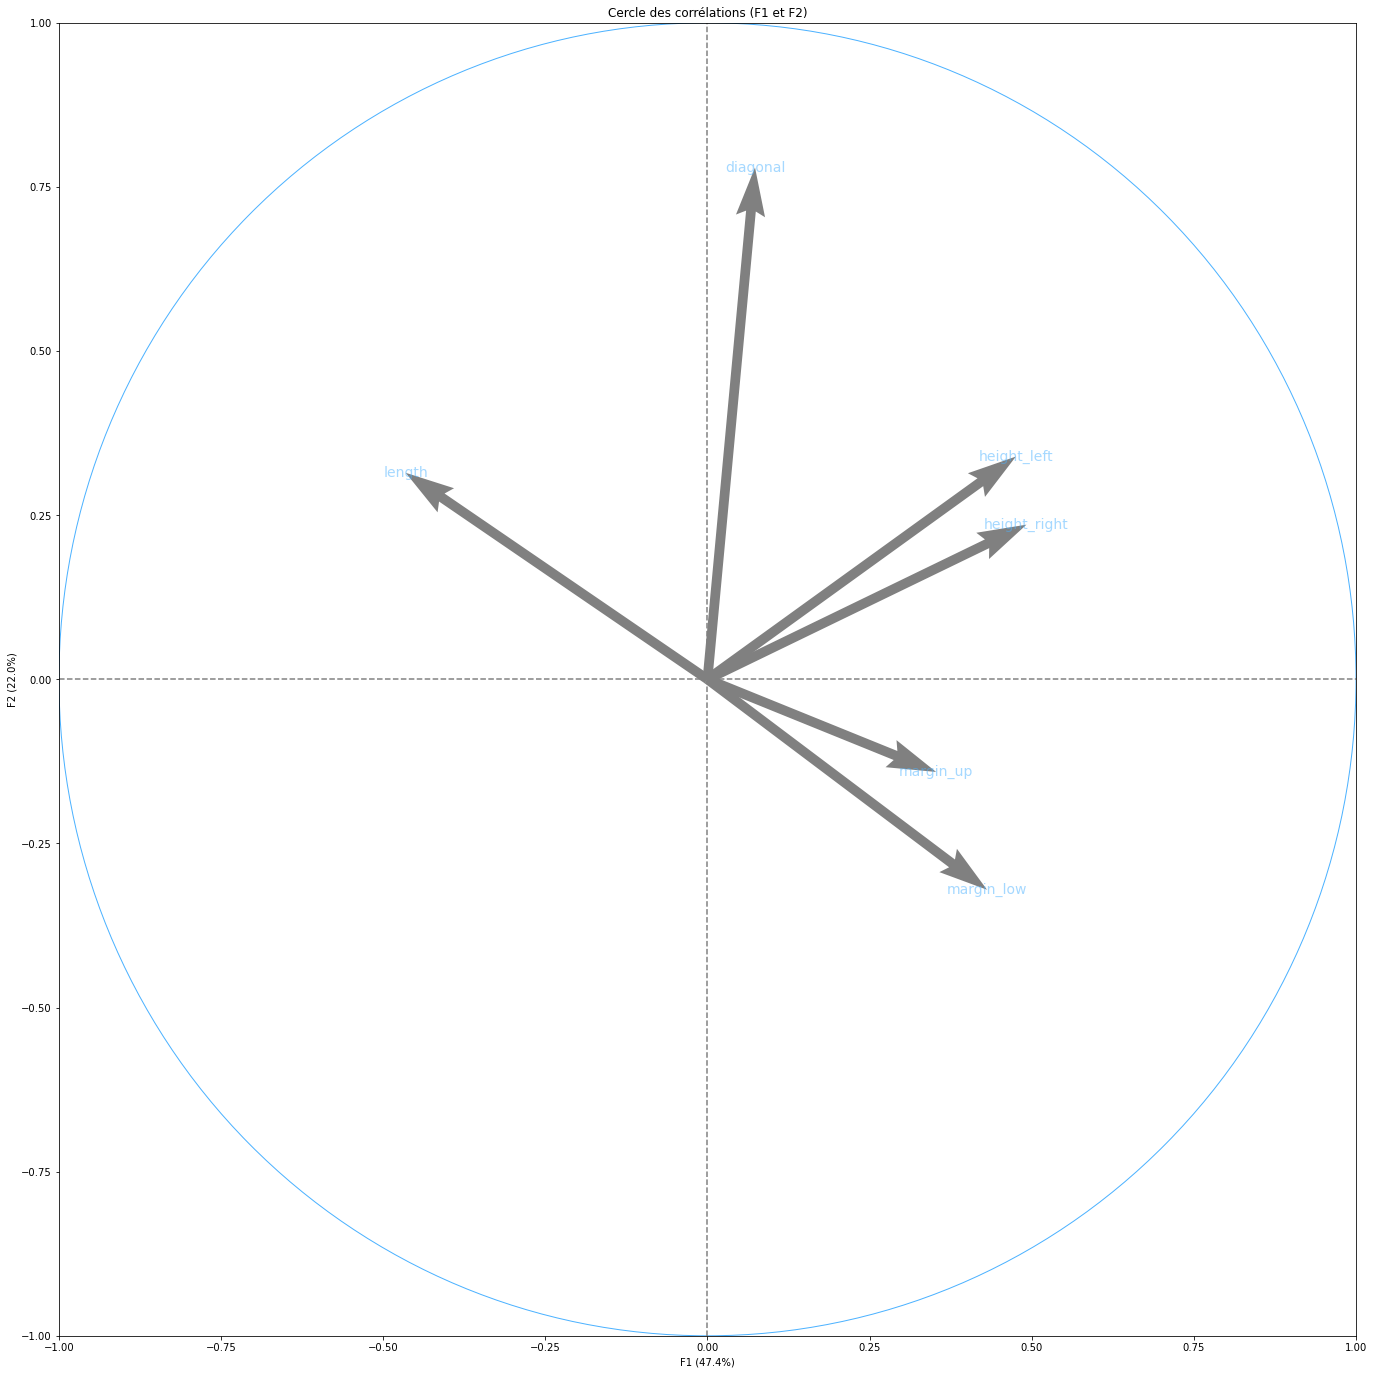

In [60]:
#figure initialization
plt.figure(figsize=(20,20))
    
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
    


plt.tight_layout(pad=4)
plt.savefig("graphiques\06. Cercle des corrélations.jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)

plt.show()

Le cercle des corrélations confirme que les dépendances entre variables ont bien été conservées après projection. Pour chaque variable, la longueur de la flèche est proportionnelle à la quantité d'informations stockée par les composantes.

La corrélation entre 2 variables se déduit par l'angle que forme leurs flèches :

0° : corrélation positive
90° : absence de corrélation
180° : corrélation négative
Les corrélations entre les 6 variables de départ ont bien été conservées après réduction en 2 dimensions. Ici, les hauteurs gauche et droite sont bien corrélées positivement, tout comme les 2 marges. L'ACP a conservé suffisamment de données pour que la représentation sur le plan factoriel soit fiable.


F1 : Longueur du billet VS hauteur / marge
F2 : Longueur de la diagonale

Je n'ai conservé que cette projection car elle est de loin la plus pertinente.

On voit que l'axe de la première composante est celui qui sépare principalement les vrais billets des faux billets. De plus, F1 explique 47% de l'inertie.

Le second axe explique 22% de l'inertie et participe à la séparation des vrais billets et des faux billets.
On voit qu'une diagonale sépare clairement les vrais et les faux billets.
F1 permet dans de nombreux cas de déterminer s'il s'agit d'un vrai billet ou non. Pour les valeurs proches de zéro, alors c'est la valeur de F2 qui va permettre de discriminer.

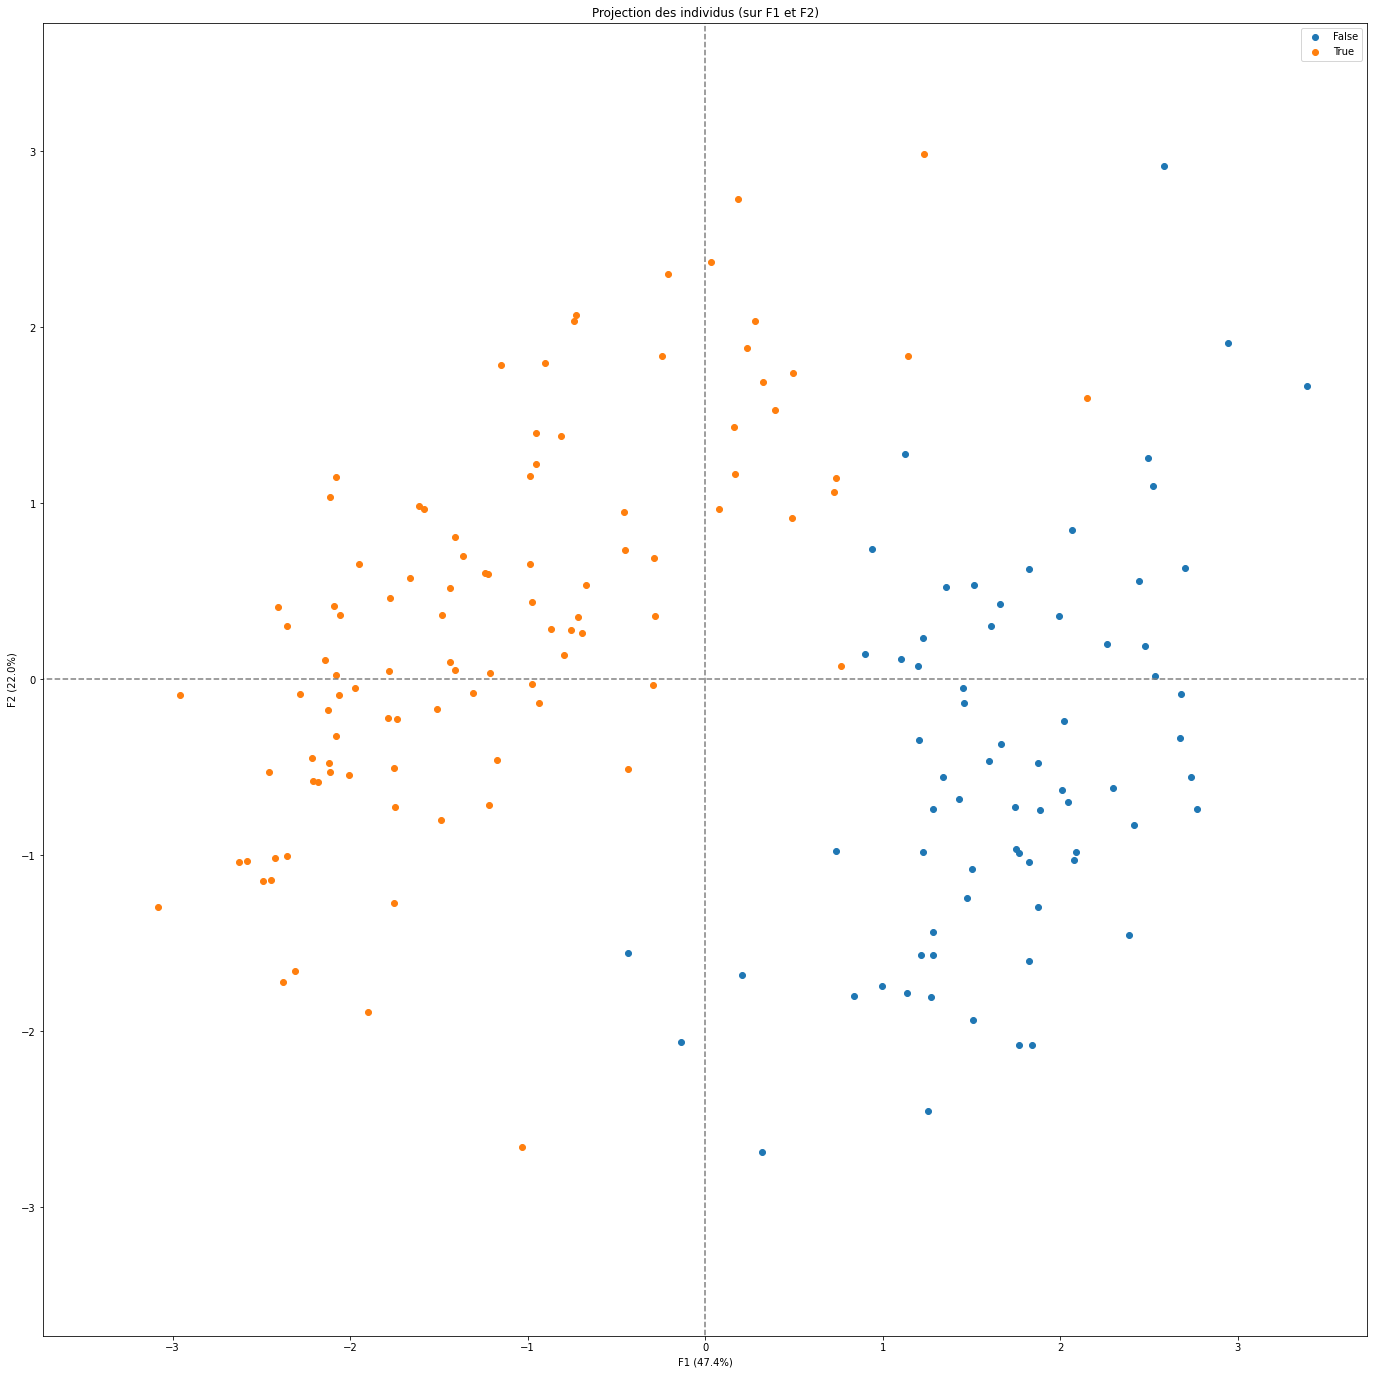

In [28]:
#figure initialization
plt.figure(figsize=(20,20))
    
    
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = df.index) 


plt.tight_layout(pad=4)
plt.savefig("graphiques\07. projection des individus.jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)

plt.show()

In [29]:
#Calcul des composantes principales
#Ici seulement F1 et F2 seront utiles à l'interprétation attendue

df_facto = pd.DataFrame(X_projected, index=names, columns=["F" + str(i+1) for i in range(6)]).iloc[:, :2]
df_facto


,F1,F2
is_genuine,,
True,2.153639,1.599709
True,-2.110416,-0.526039
True,-1.973152,-0.048102
True,-2.059795,-0.089105
True,-2.403180,0.412170
...,...,...
False,2.478626,0.189974
False,2.585331,2.914472
False,2.067245,0.845602


## Contribution des individus dans l'inertie totale:

In [30]:
#Contribution des individus dans l'inertie totale
di = np.sum(X_scaled**2,axis=1)
ctr_indiv_inertie = pd.DataFrame({'c_inertie':di, 'is_genuine':df.index})
ctr_indiv_inertie

,c_inertie,is_genuine
0,18.410598,True
1,5.444799,True
2,4.960527,True
3,4.805719,True
4,18.039567,True
...,...,...
165,7.673233,False
166,20.625650,False
167,8.567410,False
168,3.482926,False


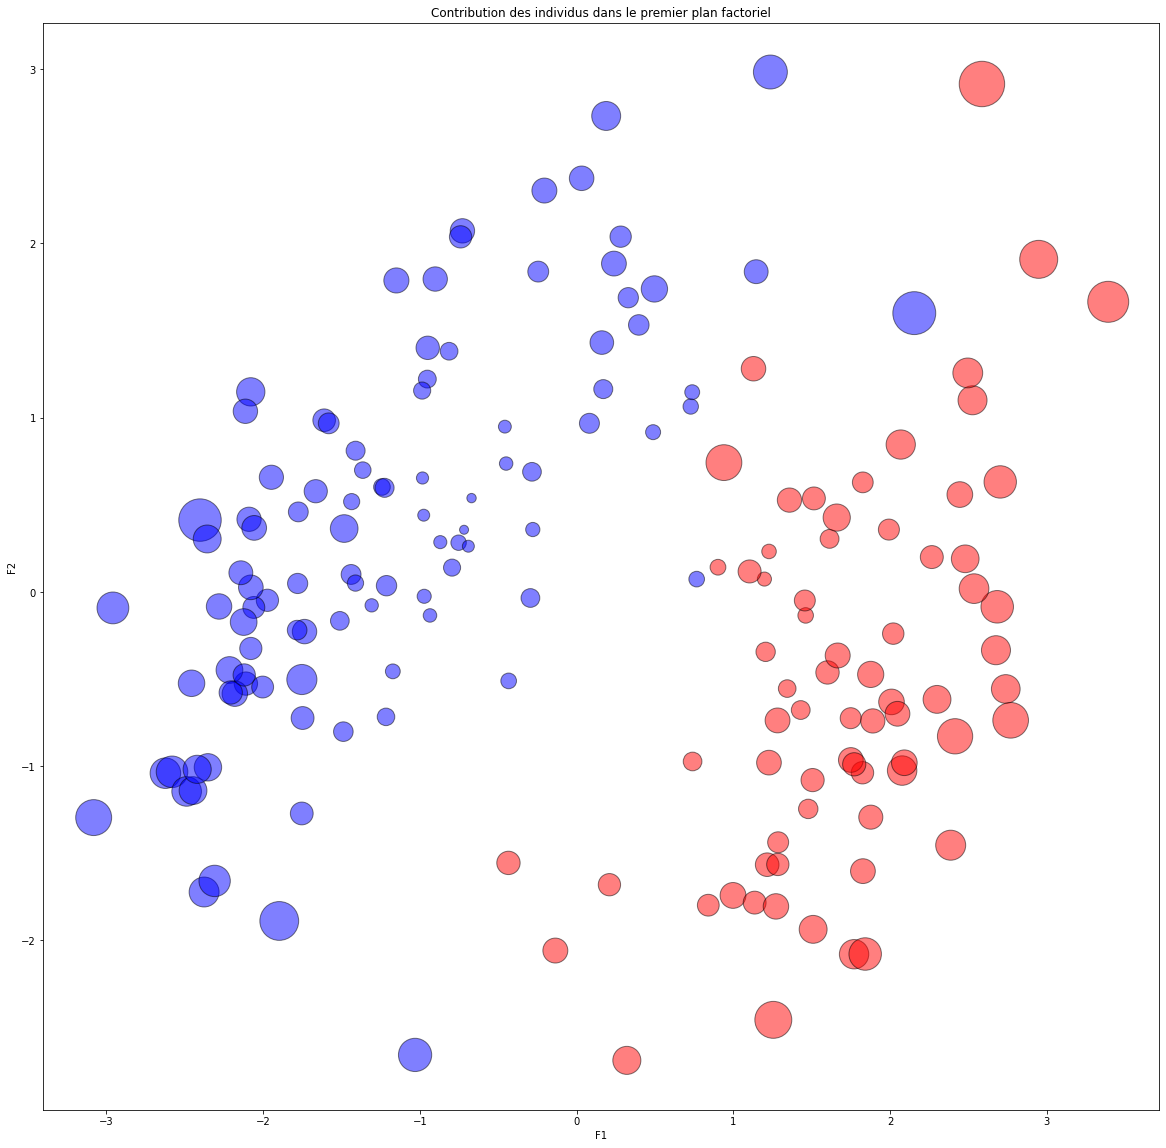

In [38]:
#Scatter Plot de la contribution des individus dans l'inertie totale
#figure initialization
plt.figure(figsize=(20,20))
    
    
colors = ['red', 'blue']
plt.scatter(df_facto['F1'], df_facto['F2'], c=data['is_genuine'].apply(lambda x: colors[x]), 
            alpha=0.5, edgecolors='black', linewidths=1,
            s=ctr_indiv_inertie['c_inertie']*100)

plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Contribution des individus dans le premier plan factoriel')

plt.savefig('graphiques/08. contribution_inertie.jpg.png')
plt.show()

## Qualité de réprésentation des individus (COS2):


In [36]:
#Qualité de représentation des individus - COS2
cos2 = X_projected**2
n_comp = 2

for j in range(n_comp):
    cos2[:,j] = cos2[:,j]/di
    
cos2_indiv = pd.DataFrame({'COS2_1':cos2[:,0],'COS2_2':cos2[:,1], 'is_genuine': data['is_genuine']})
cos2_indiv

,COS2_1,COS2_2,is_genuine
0,0.251929,0.139000,True
1,0.818002,0.050822,True
2,0.784862,0.000466,True
3,0.882856,0.001652,True
4,0.320145,0.009417,True
...,...,...,...
165,0.800651,0.004703,False
166,0.324059,0.411824,False
167,0.498809,0.083461,False
168,0.156908,0.271800,False


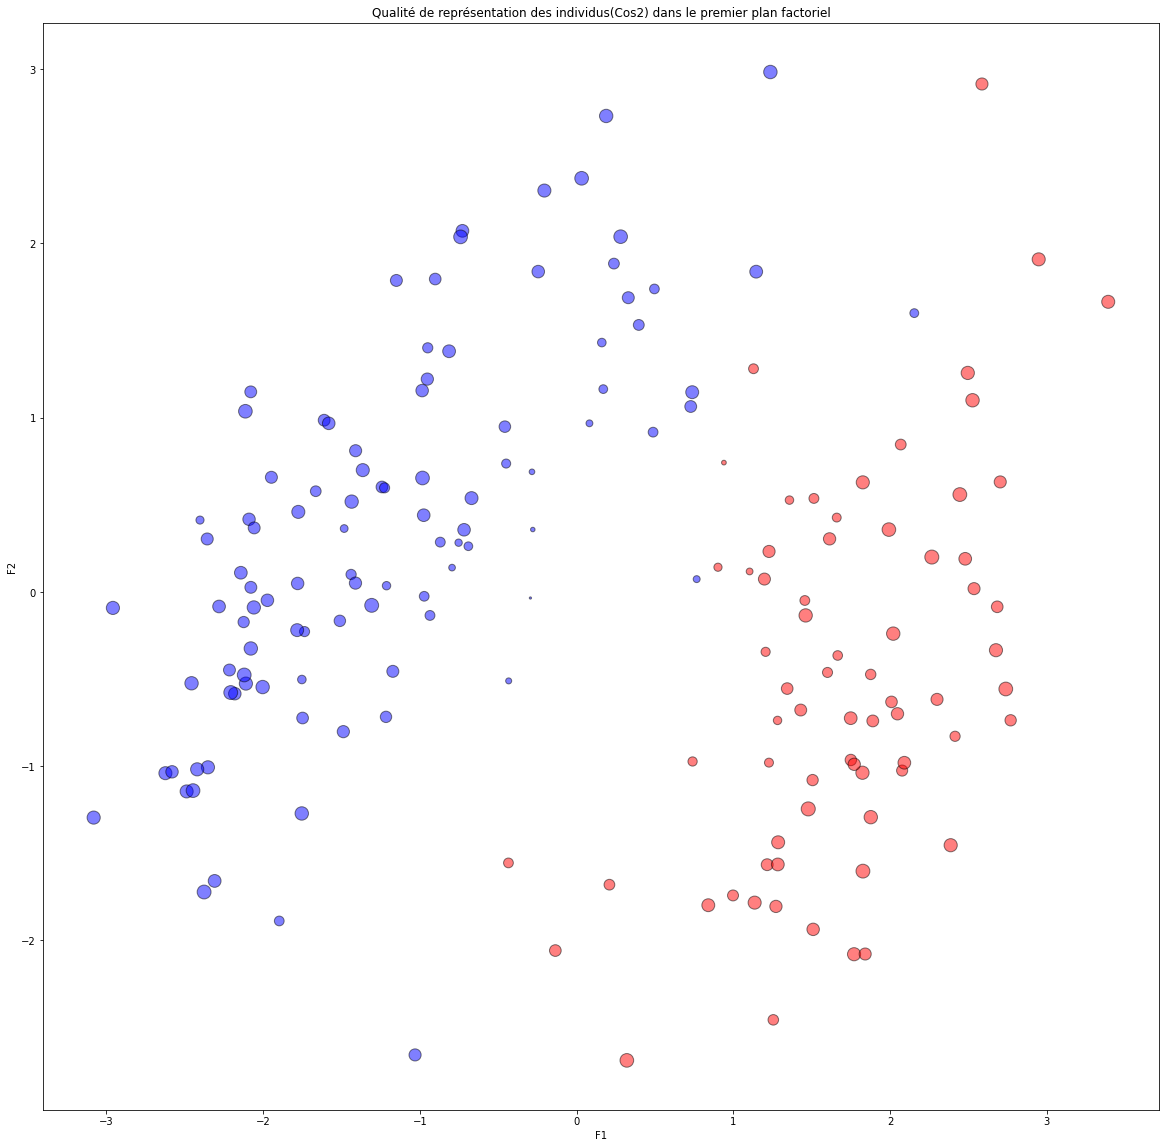

In [39]:
#Scatter Plot de la qualité de représentation des individus dans le 1er plan factoriel
#figure initialization
plt.figure(figsize=(20,20))
    
    
cos2_indiv['COS2_1 + COS2_2'] = cos2_indiv['COS2_1'] + cos2_indiv['COS2_2']
colors = ['red', 'blue']
plt.scatter(df_facto['F1'], df_facto['F2'], c=data['is_genuine'].apply(lambda x: colors[x]), 
            alpha=0.5, edgecolors='black', linewidths=1,
            s=cos2_indiv['COS2_1 + COS2_2']*200)

plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Qualité de représentation des individus(Cos2) dans le premier plan factoriel')

plt.savefig('graphiques/09. qualite_representationcos2.png')
plt.show()